In [1]:
import pandas as pd
import datetime

import numpy as np
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error
import datetime
import operator

import warnings
warnings.filterwarnings("ignore")

from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt

In [2]:
url='https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
covid_data_RAW = pd.read_csv(url)

In [3]:
covid_data = covid_data_RAW.rename(
        columns = {'Province/State':'subregion'
                   ,'Country/Region':'country'
                   ,'Lat':'lat'
                   ,'Long':'long'
                   }
        )

In [4]:
covid_data = (covid_data.melt(id_vars = ['country','subregion','lat','long']
                 ,var_name = 'date_RAW'
                 ,value_name = 'confirmed'
                 )
)

In [5]:
(covid_data
    .filter(['date_RAW'])
)

,date_RAW
0,1/22/20
1,1/22/20
2,1/22/20
3,1/22/20
4,1/22/20
...,...
315005,1/15/23
315006,1/15/23
315007,1/15/23
315008,1/15/23


In [6]:
(covid_data
    .assign(date = pd.to_datetime(covid_data.date_RAW, format='%m/%d/%y'))
    .filter(['date','date_RAW','confirmed'])
    .groupby(['date','date_RAW'])
    .agg('sum')
    .sort_values('date')
)

,,confirmed
date,date_RAW,
2020-01-22,1/22/20,557
2020-01-23,1/23/20,657
2020-01-24,1/24/20,944
2020-01-25,1/25/20,1437
2020-01-26,1/26/20,2120
...,...,...
2023-01-11,1/11/23,665649811
2023-01-12,1/12/23,666125230
2023-01-13,1/13/23,666565625


In [7]:
covid_data = covid_data.assign(
         date = pd.to_datetime(covid_data.date_RAW, format='%m/%d/%y')
         )

In [8]:
covid_data = (covid_data
               .filter(['country', 'subregion', 'date', 'lat', 'long', 'confirmed'])
               .sort_values(['country','subregion','lat','long','date'])
               )


In [9]:
covid_data.set_index('country', inplace = True)

In [10]:
pd.set_option('display.max_rows', 155)

In [11]:
(covid_data
    .reset_index()
    .filter(['country'])
    .drop_duplicates()
    .head(n = 200)
)

,country
0,Afghanistan
1090,Albania
2180,Algeria
3270,Andorra
4360,Angola
...,...
308470,Vietnam
309560,West Bank and Gaza
310650,Winter Olympics 2022
311740,Yemen


In [12]:
pd.reset_option('display.max_rows')

In [13]:
covid_data.loc['Indonesia']

,subregion,date,lat,long,confirmed
country,,,,,
Indonesia,NaN,2020-01-22,-0.7893,113.9213,0
Indonesia,NaN,2020-01-23,-0.7893,113.9213,0
Indonesia,NaN,2020-01-24,-0.7893,113.9213,0
Indonesia,NaN,2020-01-25,-0.7893,113.9213,0
Indonesia,NaN,2020-01-26,-0.7893,113.9213,0
...,...,...,...,...,...
Indonesia,NaN,2023-01-11,-0.7893,113.9213,6724683
Indonesia,NaN,2023-01-12,-0.7893,113.9213,6725095
Indonesia,NaN,2023-01-13,-0.7893,113.9213,6725458


In [14]:
def covid_rename_columns(input_data):
    output_data = input_data.rename(
                              columns = {'Province/State':'subregion'
                                         ,'Country/Region':'country'
                                         ,'Lat':'lat'
                                         ,'Long':'long'
                                         }
                              )
    return(output_data)

In [15]:
def covid_fill_missing(input_data):
    output_data = input_data.fillna(value = {'subregion':''})
    return(output_data)

In [16]:
def covid_melt_data(input_data, value_var_name):
    output_data = input_data.melt(id_vars = ['country','subregion','lat','long']
                                  ,var_name = 'date_RAW'
                                  ,value_name = value_var_name
                                  )
    return(output_data)

In [17]:
def covid_convert_dates(input_data):
    output_data = input_data.assign(
         date = pd.to_datetime(input_data.date_RAW, format='%m/%d/%y')
         )
    output_data.drop(columns = ['date_RAW'], inplace = True)
    return(output_data)

In [18]:
def covid_rearrange_data(input_data,value_var_name):
    output_data = (input_data
                   .filter(['country', 'subregion', 'date', 'lat', 'long', value_var_name])
                   .sort_values(['country','subregion','date','lat','long'])
                   .reset_index(drop = True)
                   )
    return(output_data)

In [19]:
def covid_get_data(input_url, value_var_name):
    covid_data_inprocess = pd.read_csv(input_url)
    covid_data_inprocess = covid_rename_columns(covid_data_inprocess)
    covid_data_inprocess = covid_fill_missing(covid_data_inprocess)
    covid_data_inprocess = covid_melt_data(covid_data_inprocess,value_var_name)
    covid_data_inprocess = covid_convert_dates(covid_data_inprocess)
    covid_data_inprocess = covid_rearrange_data(covid_data_inprocess, value_var_name)
    return(covid_data_inprocess)

In [20]:
url_confirmed = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
url_deaths = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'


covid_confirmed = covid_get_data(url_confirmed,'confirmed')
covid_deaths = covid_get_data(url_deaths,'dead')

In [21]:
len(covid_confirmed) # 17204
len(covid_deaths)    

315010

In [22]:
covid_deaths.drop(columns = ['lat','long'], inplace = True)

In [23]:
covid_data = (covid_confirmed
                .merge(covid_deaths, on = ['country','subregion','date'], how = 'left')
             )

In [24]:
print(covid_data)

            country subregion       date        lat       long  confirmed  \
0       Afghanistan           2020-01-22  33.939110  67.709953          0   
1       Afghanistan           2020-01-23  33.939110  67.709953          0   
2       Afghanistan           2020-01-24  33.939110  67.709953          0   
3       Afghanistan           2020-01-25  33.939110  67.709953          0   
4       Afghanistan           2020-01-26  33.939110  67.709953          0   
...             ...       ...        ...        ...        ...        ...   
315005     Zimbabwe           2023-01-11 -19.015438  29.154857     259981   
315006     Zimbabwe           2023-01-12 -19.015438  29.154857     259981   
315007     Zimbabwe           2023-01-13 -19.015438  29.154857     259981   
315008     Zimbabwe           2023-01-14 -19.015438  29.154857     259981   
315009     Zimbabwe           2023-01-15 -19.015438  29.154857     259981   

        dead  
0          0  
1          0  
2          0  
3          0  


In [25]:
#making for specifically indonesia
covidDF=(covid_data.query('country=="Indonesia"').reset_index(drop=True))

In [26]:
covidDF.drop('lat', inplace=True, axis=1)
covidDF.drop('long', inplace=True, axis=1)
covidDF.drop('subregion', inplace=True, axis=1)

In [27]:
covidDF=(covidDF.assign(new_cases=covidDF.confirmed.diff()))
covidDF=(covidDF.assign(death_cases=covidDF.dead.diff()))

In [28]:
covidDF

,country,date,confirmed,dead,new_cases,death_cases
0,Indonesia,2020-01-22,0,0,NaN,NaN
1,Indonesia,2020-01-23,0,0,0.0,0.0
2,Indonesia,2020-01-24,0,0,0.0,0.0
3,Indonesia,2020-01-25,0,0,0.0,0.0
4,Indonesia,2020-01-26,0,0,0.0,0.0
...,...,...,...,...,...,...
1085,Indonesia,2023-01-11,6724683,160705,402.0,8.0
1086,Indonesia,2023-01-12,6725095,160711,412.0,6.0
1087,Indonesia,2023-01-13,6725458,160719,363.0,8.0
1088,Indonesia,2023-01-14,6725847,160724,389.0,5.0


In [29]:
#changing the date from the data to date itself
covidDF["date"] = pd.to_datetime(covidDF["date"], format = "%Y-%m-%d")
covidDF

,country,date,confirmed,dead,new_cases,death_cases
0,Indonesia,2020-01-22,0,0,NaN,NaN
1,Indonesia,2020-01-23,0,0,0.0,0.0
2,Indonesia,2020-01-24,0,0,0.0,0.0
3,Indonesia,2020-01-25,0,0,0.0,0.0
4,Indonesia,2020-01-26,0,0,0.0,0.0
...,...,...,...,...,...,...
1085,Indonesia,2023-01-11,6724683,160705,402.0,8.0
1086,Indonesia,2023-01-12,6725095,160711,412.0,6.0
1087,Indonesia,2023-01-13,6725458,160719,363.0,8.0
1088,Indonesia,2023-01-14,6725847,160724,389.0,5.0


In [30]:
#dropping all the nan values
covidDF=covidDF.dropna()
covidDF

,country,date,confirmed,dead,new_cases,death_cases
1,Indonesia,2020-01-23,0,0,0.0,0.0
2,Indonesia,2020-01-24,0,0,0.0,0.0
3,Indonesia,2020-01-25,0,0,0.0,0.0
4,Indonesia,2020-01-26,0,0,0.0,0.0
5,Indonesia,2020-01-27,0,0,0.0,0.0
...,...,...,...,...,...,...
1085,Indonesia,2023-01-11,6724683,160705,402.0,8.0
1086,Indonesia,2023-01-12,6725095,160711,412.0,6.0
1087,Indonesia,2023-01-13,6725458,160719,363.0,8.0
1088,Indonesia,2023-01-14,6725847,160724,389.0,5.0


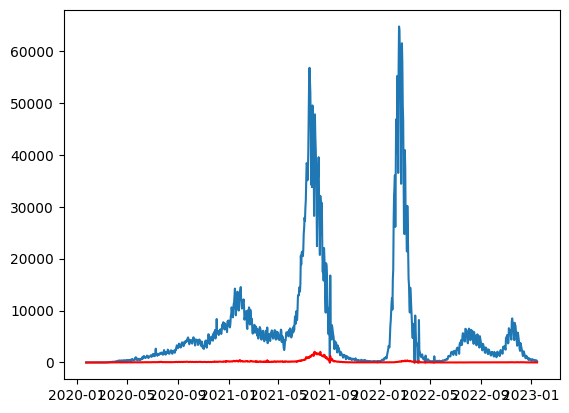

In [31]:
plt.plot(covidDF['date'],covidDF['new_cases'])
plt.plot(covidDF['date'],covidDF['death_cases'],color='red')

Supervised learning 

In [32]:
scaler=MinMaxScaler()

#getting only the remaining columns
confirmed=covidDF.iloc[701:1070, 2]
dead=covidDF.iloc[701:1070, 3]
Cov_19=pd.DataFrame(confirmed)
Cov_19['dead']=dead
Cov_19


,confirmed,dead
702,4261412,144047
703,4261667,144053
704,4261667,144053
705,4261879,144063
706,4262157,144071
...,...,...
1066,6714802,160507
1067,6715586,160524
1068,6716124,160537
1069,6716592,160551


In [33]:

totalDataset=scaler.fit_transform(Cov_19[['confirmed','dead']])
TotalDataScaled=pd.DataFrame(totalDataset,columns=['confirmed','dead'])

In [34]:
array=[]
index=TotalDataScaled.index
for i in index:
    array.append(i+700)

TotalDataScaled['index']=array
TotalDataScaled=TotalDataScaled.set_index('index')
TotalDataScaled

,confirmed,dead
index,,
700,0.000000,0.000000
701,0.000104,0.000363
702,0.000104,0.000363
703,0.000190,0.000969
704,0.000303,0.001453
...,...,...
1064,0.998944,0.996790
1065,0.999263,0.997820
1066,0.999482,0.998607


In [35]:
yTrain = covidDF.iloc[0:700, 4]
xTrain = covidDF.iloc[0:700, 2]

yTest = covidDF.iloc[701:1070, 4]
xTest = covidDF.iloc[701:1070, 2]

xTrain = xTrain.to_numpy()
xTest = xTest.to_numpy()

xTrain = xTrain.reshape(-1, 1)
xTest = xTest.reshape(-1, 1)




In [36]:
SVM = SVR(kernel ="rbf", gamma = 1, C = 0.1, epsilon = 1)
SVM.fit(xTrain,yTrain)

SVR(C=0.1, epsilon=1, gamma=1)

In [37]:
yPredict = SVM.predict(xTest)

In [38]:
mean_absolute_error(yTest, yPredict)

5776.783197831978

In [39]:
scaled_prediction=scaler.fit_transform(xTest,yPredict)
scaled_prediction

array([[0.00000000e+00],
       [1.03828080e-04],
       [1.03828080e-04],
       [1.90147896e-04],
       [3.03340862e-04],
       [3.82331637e-04],
       [4.59286567e-04],
       [5.32576976e-04],
       [6.44141266e-04],
       [7.14988662e-04],
       [8.22888432e-04],
       [9.44631946e-04],
       [1.10912820e-03],
       [1.32614924e-03],
       [1.53706276e-03],
       [1.73209668e-03],
       [1.94748905e-03],
       [2.13234375e-03],
       [2.45889324e-03],
       [2.72192438e-03],
       [3.04480935e-03],
       [3.39090295e-03],
       [3.82005902e-03],
       [4.16818846e-03],
       [4.48252288e-03],
       [5.03708698e-03],
       [5.74759679e-03],
       [6.60916627e-03],
       [7.66943419e-03],
       [8.97441065e-03],
       [1.01653798e-02],
       [1.13571633e-02],
       [1.33433334e-02],
       [1.61975877e-02],
       [1.94862912e-02],
       [2.35192996e-02],
       [2.82375733e-02],
       [3.32954259e-02],
       [3.74424416e-02],
       [4.39656952e-02],


In [40]:
dates=covidDF.iloc[701:1070, 1]
PredictedAndReal2=pd.DataFrame(dates)

In [41]:
PredictedAndReal2['new_cases_real']=TotalDataScaled['confirmed']
PredictedAndReal2['Cases_predicted']=scaled_prediction
PredictedAndReal2

,date,new_cases_real,Cases_predicted
702,2021-12-24,0.000104,0.000000
703,2021-12-25,0.000190,0.000104
704,2021-12-26,0.000303,0.000104
705,2021-12-27,0.000382,0.000190
706,2021-12-28,0.000459,0.000303
...,...,...,...
1066,2022-12-23,0.999482,0.998944
1067,2022-12-24,0.999673,0.999263
1068,2022-12-25,1.000000,0.999482
1069,2022-12-26,NaN,0.999673


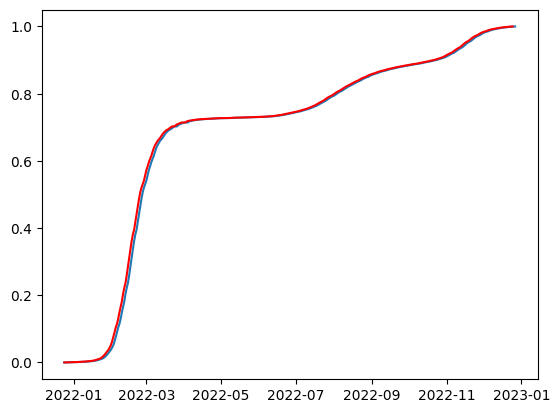

In [42]:
plt.plot(PredictedAndReal2['date'],PredictedAndReal2['Cases_predicted'])
plt.plot(PredictedAndReal2['date'],PredictedAndReal2['new_cases_real'],color='red')

In [43]:
#predict the prediction of death using the cases
yTrain = covidDF.iloc[0:600, 5]
xTrain = covidDF.iloc[0:600, 4]

yTest = covidDF.iloc[0:1070, 5]
xTest = covidDF.iloc[0:1070, 4]

xTrain = xTrain.to_numpy()
xTest = xTest.to_numpy()

xTrain = xTrain.reshape(-1, 1)
xTest = xTest.reshape(-1, 1)

In [44]:
SVM = SVR(kernel ="linear", gamma = 1.0, C = 0.01, epsilon = 0.01, )
SVM.fit(xTrain,yTrain)

yPredict = SVM.predict(xTest)

In [45]:
mean_absolute_error(yTest, yPredict)

97.5538414611751

In [46]:
scaled_prediction=scaler.fit_transform(xTest,yPredict)

In [47]:
dates=covidDF.iloc[0:1070, 1]

In [48]:
PredictedAndReal=pd.DataFrame(dates)


In [49]:
realD=covidDF.iloc[0:1070,5]
realD=realD.to_numpy()
realD=realD.reshape(-1,1)
scaler.fit(realD)
scVer=scaler.transform(realD)
PredictedAndReal['deaths_real']=scVer
PredictedAndReal['deaths_predicted']=scaled_prediction

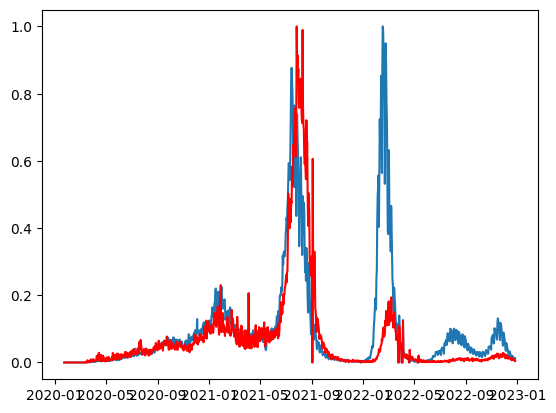

In [50]:
plt.plot(PredictedAndReal['date'],PredictedAndReal['deaths_predicted'])
plt.plot(PredictedAndReal['date'],PredictedAndReal['deaths_real'],color='red')

In [51]:
#predict the prediction of death using the cases
yTrain = covidDF.iloc[0:600, 5]
xTrain = covidDF.iloc[0:600, 4]

yTest = covidDF.iloc[300:1070, 5]
xTest = covidDF.iloc[300:1070, 4]

xTrain = xTrain.to_numpy()
xTest = xTest.to_numpy()

xTrain = xTrain.reshape(-1, 1)
xTest = xTest.reshape(-1, 1)

In [52]:
SVM = SVR(kernel ="linear", gamma = 1.0, C = 0.01, epsilon = 0.01, )
SVM.fit(xTrain,yTrain)

yPredict = SVM.predict(xTest)

In [53]:
mean_absolute_error(yTest, yPredict)

130.3858638318325

In [54]:
scaled_prediction=scaler.fit_transform(xTest,yPredict)

In [55]:
dates=covidDF.iloc[300:1070, 1]
PredictedAndReal=pd.DataFrame(dates)
realD=covidDF.iloc[300:1070,5]
realD=realD.to_numpy()
realD=realD.reshape(-1,1)
scaler.fit(realD)
scVer=scaler.transform(realD)
PredictedAndReal['deaths_real']=scVer
PredictedAndReal['deaths_predicted']=scaled_prediction

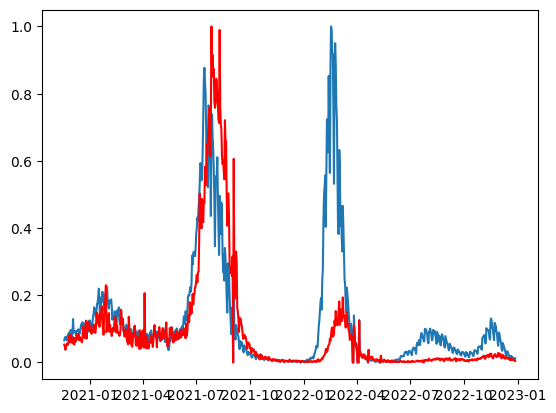

In [56]:
plt.plot(PredictedAndReal['date'],PredictedAndReal['deaths_predicted'])
plt.plot(PredictedAndReal['date'],PredictedAndReal['deaths_real'],color='red')

In [57]:
#predict the prediction of death using the cases
yTrain = covidDF.iloc[0:600, 5]
xTrain = covidDF.iloc[0:600, 4]

yTest = covidDF.iloc[600:1070, 5]
xTest = covidDF.iloc[600:1070, 4]

xTrain = xTrain.to_numpy()
xTest = xTest.to_numpy()

xTrain = xTrain.reshape(-1, 1)
xTest = xTest.reshape(-1, 1)

In [58]:
SVM = SVR(kernel ="linear", gamma = 1.0, C = 0.01, epsilon = 0.01, )
SVM.fit(xTrain,yTrain)

yPredict = SVM.predict(xTest)

In [59]:

mean_absolute_error(yTest, yPredict)

118.42788576006848

In [60]:

scaled_prediction=scaler.fit_transform(xTest,yPredict)

In [61]:
dates=covidDF.iloc[600:1070, 1]
PredictedAndReal=pd.DataFrame(dates)
realD=covidDF.iloc[600:1070,5]
realD=realD.to_numpy()
realD=realD.reshape(-1,1)
scaler.fit(realD)
scVer=scaler.transform(realD)
PredictedAndReal['deaths_real']=scVer
PredictedAndReal['deaths_predicted']=scaled_prediction

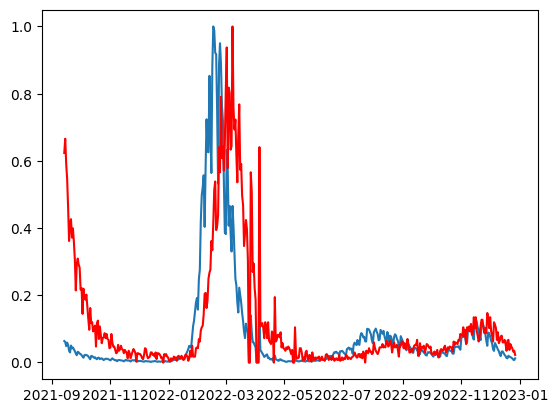

In [62]:
plt.plot(PredictedAndReal['date'],PredictedAndReal['deaths_predicted'])
plt.plot(PredictedAndReal['date'],PredictedAndReal['deaths_real'],color='red')

In [63]:
#predict the prediction of death using the cases
yTrain = covidDF.iloc[0:600, 5]
xTrain = covidDF.iloc[0:600, 4]

yTest = covidDF.iloc[900:1070, 5]
xTest = covidDF.iloc[900:1070, 4]

xTrain = xTrain.to_numpy()
xTest = xTest.to_numpy()

xTrain = xTrain.reshape(-1, 1)
xTest = xTest.reshape(-1, 1)

In [64]:
SVM = SVR(kernel ="linear", gamma = 1.0, C = 0.01, epsilon = 0.01, )
SVM.fit(xTrain,yTrain)

yPredict = SVM.predict(xTest)

In [65]:
mean_absolute_error(yTest, yPredict)

80.04480416337199

In [66]:
scaled_prediction=scaler.fit_transform(xTest,yPredict)

In [67]:
dates=covidDF.iloc[900:1070, 1]
PredictedAndReal=pd.DataFrame(dates)
realD=covidDF.iloc[900:1070,5]
realD=realD.to_numpy()
realD=realD.reshape(-1,1)
scaler.fit(realD)
scVer=scaler.transform(realD)
PredictedAndReal['deaths_real']=scVer
PredictedAndReal['deaths_predicted']=scaled_prediction

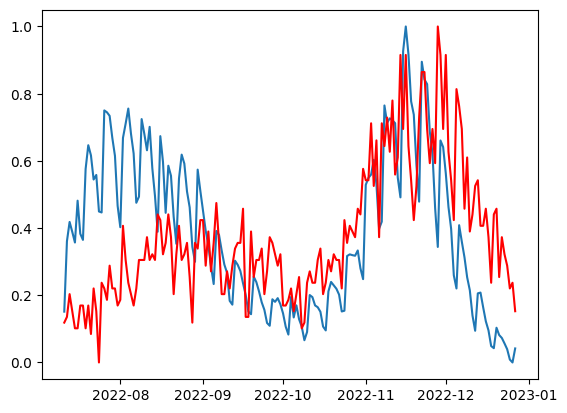

In [68]:
plt.plot(PredictedAndReal['date'],PredictedAndReal['deaths_predicted'])
plt.plot(PredictedAndReal['date'],PredictedAndReal['deaths_real'],color='red')

In [69]:
#predict the prediction of death using the cases
yTrain = covidDF.iloc[0:600, 5]
xTrain = covidDF.iloc[0:600, 4]

yTest = covidDF.iloc[1000:1070, 5]
xTest = covidDF.iloc[1000:1070, 4]

xTrain = xTrain.to_numpy()
xTest = xTest.to_numpy()

xTrain = xTrain.reshape(-1, 1)
xTest = xTest.reshape(-1, 1)

In [70]:
SVM = SVR(kernel ="linear", gamma = 1.0, C = 0.01, epsilon = 0.01, )
SVM.fit(xTrain,yTrain)

yPredict = SVM.predict(xTest)
scaled_prediction=scaler.fit_transform(xTest,yPredict)

In [71]:
mean_absolute_error(yTest, yPredict)

73.55917453812611

In [72]:

scaled_prediction=scaler.fit_transform(xTest,yPredict)

In [73]:
dates=covidDF.iloc[1000:1070, 1]
PredictedAndReal=pd.DataFrame(dates)
realD=covidDF.iloc[1000:1070,5]
realD=realD.to_numpy()
realD=realD.reshape(-1,1)
scaler.fit(realD)
scVer=scaler.transform(realD)
PredictedAndReal['deaths_real']=scVer
PredictedAndReal['deaths_predicted']=scaled_prediction

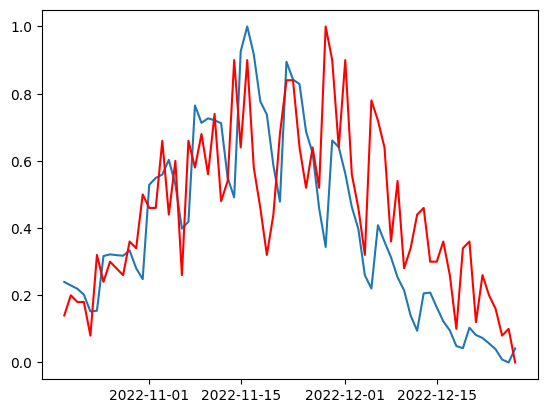

In [74]:
plt.plot(PredictedAndReal['date'],PredictedAndReal['deaths_predicted'])
plt.plot(PredictedAndReal['date'],PredictedAndReal['deaths_real'],color='red')